In [94]:
import torch
import matplotlib.pyplot as plt
from torch import nn 
import numpy as np
print(torch.__version__)

2.0.1


## 1. Data Preparation

In [95]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [96]:
#splitting data into training and test
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

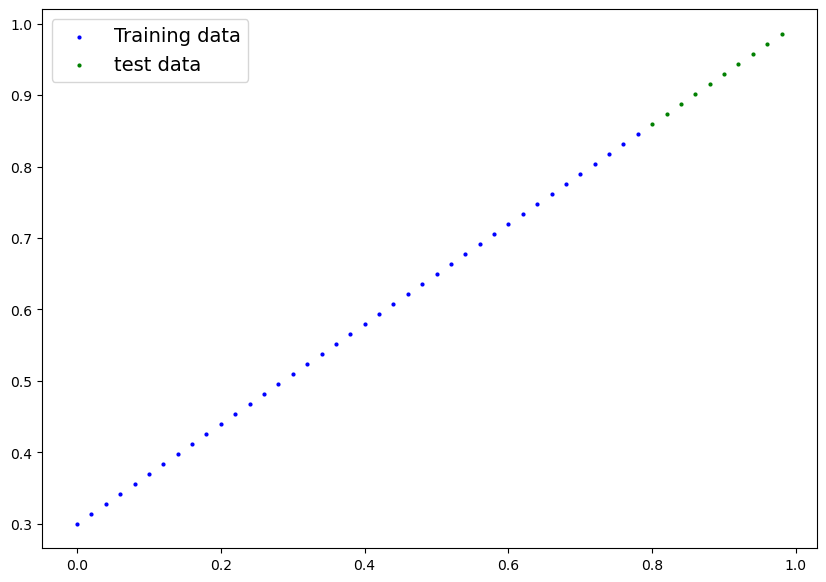

In [97]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=None):
    """
    Plots trainig data, test data and compares predictions
    """
    
    plt.figure(figsize=(10,7))
    
    #plot training data in blue
    plt.scatter(train_data, train_labels, c= "b", s=4, label = "Training data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="test data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="predictions")
    
    plt.legend(prop={"size": 14})
    
    plt.show()
    
plot_predictions()
    
    
    
    
                     

In [98]:
#buliding our first model
class Linear_Regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, 
                                                requires_grad = True,
                                                dtype=torch.float))
        
        self.bias = nn.Parameter(torch.randn(1, 
                                                requires_grad = True,
                                                dtype=torch.float))
        
        
    #Any subclass of the nn.Module needs to have (override) a forward method
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
    

In [99]:
torch.manual_seed(42)
model_0= Linear_Regression()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [100]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [101]:
pred_labels = model_0.forward(X_train)

In [102]:
#with inference mode turns off back tracking makes the code run faster
#with torch.no_grad() works as well but inference mode is preffered

with torch.inference_mode():
    y_preds = model_0(X_test)

In [103]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

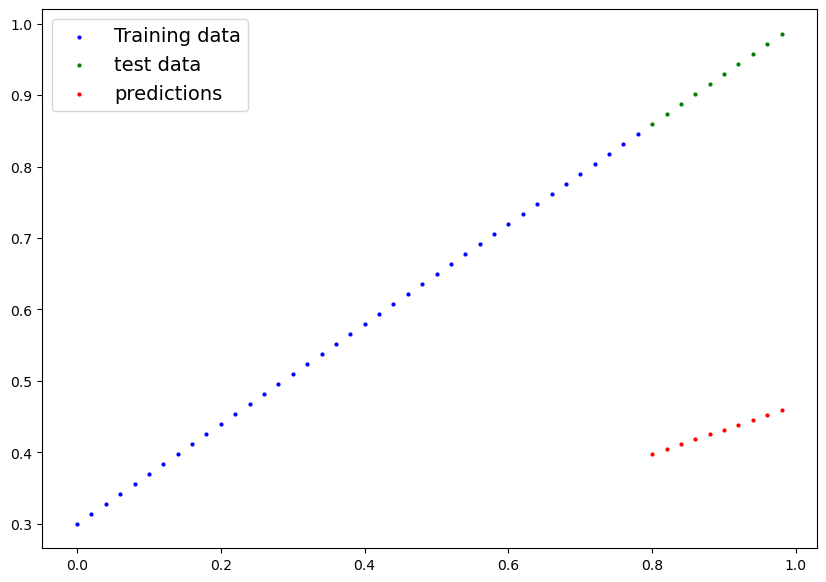

In [104]:
plot_predictions(predictions=y_preds)

In [105]:
#setting up a loss function\
loss_fn = nn.L1Loss()


#setup optimiser 
optimiser = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.0001)

In [124]:

#buiildingg training loop
torch.manual_seed(42)
epochs = 100

for epoch in range(epochs):
    model_0.train()
    
    #forwaed pass
    y_pred = model_0(X_train)
    
    #loss function
    loss = loss_fn(y_pred, y_train)
    
    #optimsiser zero grad
    optimiser.zero_grad()
    
    #perfprm backpropagation on the loss with respect to the parameters
    loss.backward()
    
    optimiser.step()

    
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        
        test_loss = loss_fn(test_pred, y_test)
    if epoch%10== 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test_loss: {test_loss}")   
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.23223009705543518 | Test_loss: 0.40009626746177673
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1989]))])
Epoch: 10 | Loss: 0.23107793927192688 | Test_loss: 0.39874905347824097
OrderedDict([('weights', tensor([0.3644])), ('bias', tensor([0.1999]))])
Epoch: 20 | Loss: 0.22992578148841858 | Test_loss: 0.3974018096923828
OrderedDict([('weights', tensor([0.3648])), ('bias', tensor([0.2009]))])
Epoch: 30 | Loss: 0.22877362370491028 | Test_loss: 0.39605459570884705
OrderedDict([('weights', tensor([0.3652])), ('bias', tensor([0.2019]))])
Epoch: 40 | Loss: 0.2276214361190796 | Test_loss: 0.3947073817253113
OrderedDict([('weights', tensor([0.3656])), ('bias', tensor([0.2029]))])
Epoch: 50 | Loss: 0.2264692783355713 | Test_loss: 0.3933602273464203
OrderedDict([('weights', tensor([0.3660])), ('bias', tensor([0.2039]))])
Epoch: 60 | Loss: 0.225317120552063 | Test_loss: 0.39201295375823975
OrderedDict([('weights', tensor([0.3664])), ('bias', tensor([0.2049]))])


In [125]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])

In [126]:
weight,  bias

(0.7, 0.3)

In [127]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

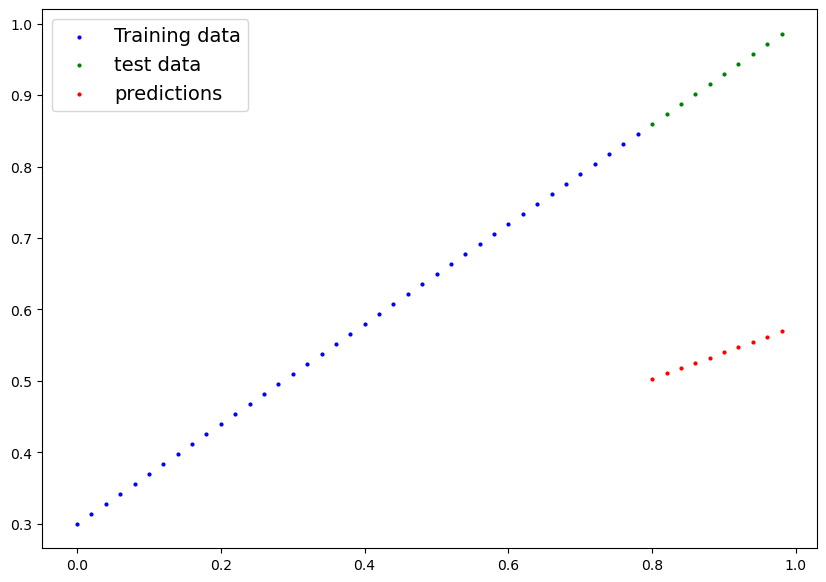

In [128]:
plot_predictions(predictions=y_preds_new)